In [1]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## Polynomial Fit
In this example we will look at the most simple of a machine learning algorithm: the polynomial fit.
We start with data obtained by our control example.

In [2]:
# Import data from control example
y = np.genfromtxt("bacteria.csv", delimiter=",")
x = np.arange(len(y))

In [44]:
# Now to the polynomial fit with numpy
deg = 5
degs = range(2, deg)
res = []
for d in degs:
    res.append(np.poly1d(np.polyfit(x, y, deg=d)))

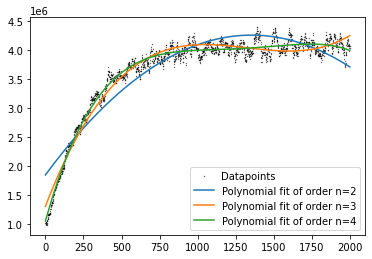

In [45]:
# Now plot results
fig, ax = plt.subplots()
ax.scatter(x, y, marker=".", color="k", alpha=1, s=0.3, label="Datapoints")
for i, d in enumerate(degs):
    ax.plot(x, res[i](x), linestyle="-", label="Polynomial fit of order n=" + str(d))
ax.legend()
fig.savefig("Polynomial_fit_polynom.png")
plt.show()
fig.clf()

## Logistic Fit
We will now fit the same data with a logistic fit.

In [46]:
def logistic_func(x, L, k, x0):
    return L/(1+np.exp(-k*(x-x0)))

In [47]:
# Supply initial guess for parameters L, k, x0
p0 = (4.5E+06, 0.1, 0.0)
popt, pcov = curve_fit(logistic_func, x, y, p0=p0)

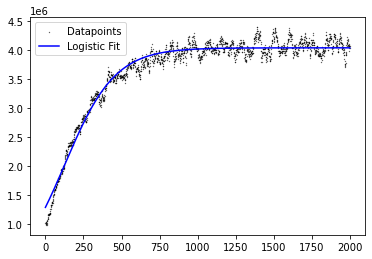

In [48]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker=".", color="k", alpha=1, s=0.3, label="Datapoints")
ax.plot(x, logistic_func(x, *popt), linestyle="-", color="blue", label="Logistic Fit")
ax.legend()
fig.savefig("Polynomial_fit_logistic.png")
plt.show()
fig.clf()

## Linear Fit
Same procedure for a fourier series

In [49]:
def linear_func(x, a, b):
    return a*x+b

In [50]:
# Initial guess
p0 = (1.5E+06/250, 3.0E+06)
popt, pcov = curve_fit(linear_func, x, y, p0=p0)

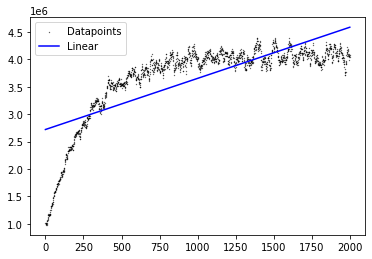

In [51]:
fig, ax = plt.subplots()
ax.scatter(x, y, marker=".", color="k", alpha=1, s=0.3, label="Datapoints")
ax.plot(x, linear_func(x, *popt), linestyle="-", color="blue", label="Linear")
ax.legend()
fig.savefig("Polynomial_fit_linear.png")
plt.show()
fig.clf()